In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-03-24 21:38:03--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2a00:1450:4009:808::2010, 172.217.169.16
Connecting to storage.googleapis.com (storage.googleapis.com)|2a00:1450:4009:808::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  17.0MB/s    in 8.4s    

2020-03-24 21:38:12 (16.9 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2020-03-24 21:38:12--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2a00:1450:4009:808::2010, 172.217.169.16
Connecting to storage.googleapis.com (storage.googleapis.com)|2a00:1450:4009:808::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1148

In [2]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

## Building a Small Model from Scratch
But before we continue, let's start defining the model:

In [3]:
import tensorflow as tf

In [4]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [5]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [7]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=100,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 8 steps, validate for 8 steps
Epoch 1/100
8/8 [==============================] - 37s 5s/step - loss: 0.6882 - acc: 0.5584 - val_loss: 0.6703 - val_acc: 0.5703
Epoch 2/100
8/8 [==============================] - 41s 5s/step - loss: 0.6562 - acc: 0.6455 - val_loss: 0.6741 - val_acc: 0.5039
Epoch 3/100
8/8 [==============================] - 37s 5s/step - loss: 0.6352 - acc: 0.6796 - val_loss: 0.6811 - val_acc: 0.5039
Epoch 4/100
8/8 [==============================] - 36s 5s/step - loss: 0.5551 - acc: 0.7353 - val_loss: 1.0119 - val_acc: 0.5000
Epoch 5/100
8/8 [==============================] - 36s 5s/step - loss: 0.5547 - acc: 0.6885 - val_loss: 0.6724 - val_acc: 0.5312
Epoch 6/100
8/8 [==============================] - 36s 5s/step - loss: 0.5248 - acc: 0.7164 - val_loss: 0.6944 - val_acc: 0.5312
Epoch 7/100
8/8 [==============================] - 36s 5s/step - loss: 0.5196 - acc: 0.7297 - val_loss: 0.6095 - val_acc: 0.6211
Epoch 8

8/8 [==============================] - 33s 4s/step - loss: 0.2421 - acc: 0.8910 - val_loss: 2.2320 - val_acc: 0.5703
Epoch 63/100
8/8 [==============================] - 33s 4s/step - loss: 0.1582 - acc: 0.9355 - val_loss: 3.1736 - val_acc: 0.5391
Epoch 64/100
8/8 [==============================] - 33s 4s/step - loss: 0.1771 - acc: 0.9210 - val_loss: 3.2766 - val_acc: 0.5352
Epoch 65/100
8/8 [==============================] - 33s 4s/step - loss: 0.2563 - acc: 0.8899 - val_loss: 2.5579 - val_acc: 0.5664
Epoch 66/100
8/8 [==============================] - 34s 4s/step - loss: 0.1450 - acc: 0.9410 - val_loss: 1.5723 - val_acc: 0.6602
Epoch 67/100
8/8 [==============================] - 33s 4s/step - loss: 0.1870 - acc: 0.9132 - val_loss: 3.6280 - val_acc: 0.5195
Epoch 68/100
8/8 [==============================] - 37s 5s/step - loss: 0.2223 - acc: 0.9121 - val_loss: 2.6053 - val_acc: 0.5781
Epoch 69/100
8/8 [==============================] - 33s 4s/step - loss: 0.1414 - acc: 0.9422 - val_loss

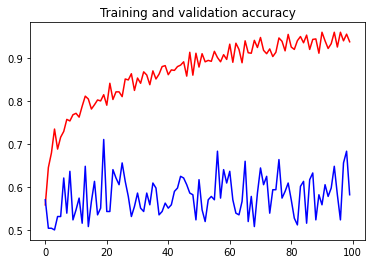

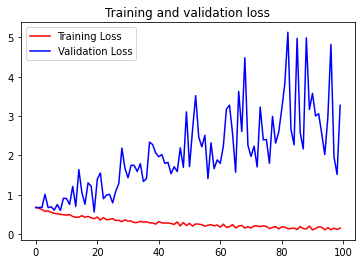

In [8]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()